In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

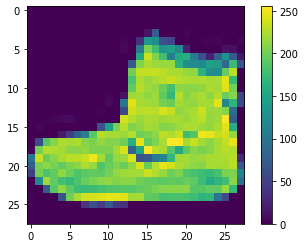

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

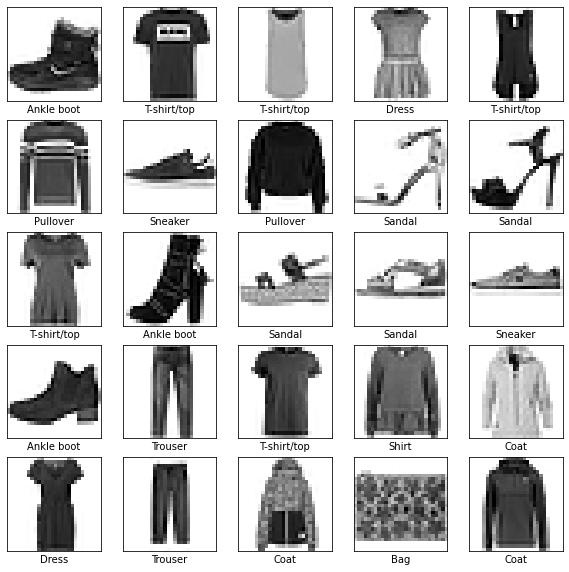

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#utworzenie modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4977 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3775 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3154 - accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8897
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [15]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'Strata: {test_loss}, dokładność: {test_acc}')

313/313 - 1s - loss: 0.3346 - accuracy: 0.8853 - 579ms/epoch - 2ms/step
Strata: 0.33457890152931213, dokładność: 0.8852999806404114


In [17]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [19]:
predictions[0]

array([1.5029119e-09, 9.8583399e-08, 1.7095605e-09, 7.5176954e-10,
 2.7312046e-08, 3.1294316e-02, 2.3438893e-06, 1.6738160e-02,
 3.2691156e-07, 9.5196468e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_images(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

In [23]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

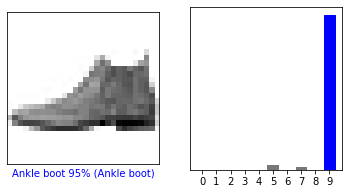

In [24]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

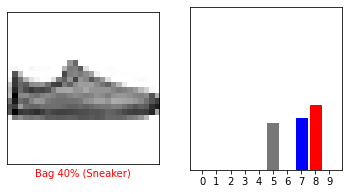

In [25]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

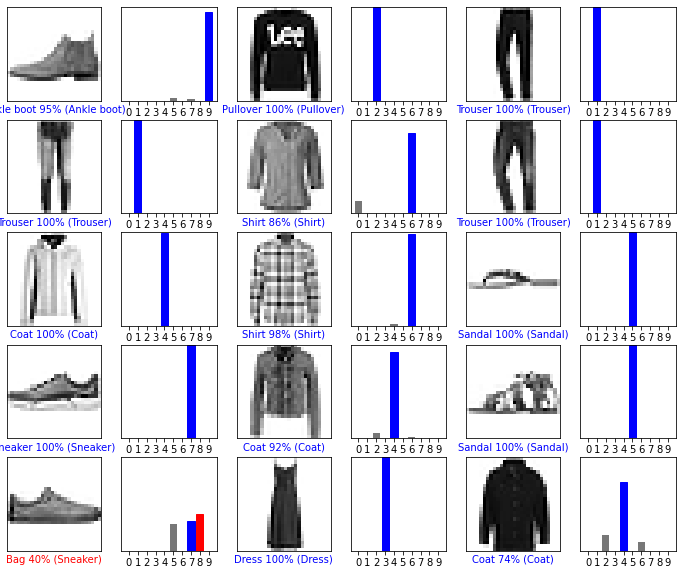

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_images(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.show()